# SymPyでLENのモデルを解く方法

In [1]:
%matplotlib inline
from sympy import * #SymPyのインポート
# to print with mathjax on jupyter notebook
init_printing() #jupyter上で綺麗に数式を表示する

SymPy上で確率変数を使う場合には，以下のモジュールもインポートしておく．

In [2]:
from sympy.stats import *

変数の定義をする．
- とりあえずシングルタスク．
- symbolsを使ってまとめて定義することも可能．
    - Symbolで1個ずつ定義した方があとで変更があったときには楽な気がする．

In [3]:
e = Symbol('e') #努力
alpha = Symbol('alpha') #固定給
beta  = Symbol('beta') #インセンティブレート
k = Symbol('k') #努力の限界不効用
sigma = Symbol('sigma', positive=True) #標準偏差．positive=Trueを指定しておく．
epsilon = Normal('varepsilon', 0, sigma) #誤差項（sympy.statsをインポートしておく必要あり）
m = Symbol('m') #業績指標の努力感応度
b = Symbol('b') #企業価値の努力感応度

業績指標，努力コスト，報酬の定義

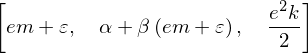

In [4]:
y = m*e + epsilon #業績指標
w = alpha + beta*y #報酬
c = Rational(1,2)*k*e**2 #努力コスト．分数はRational（分子,分母)で定義．
[y,w,c] #定義できてるかまとめてチェック

リスクプレミアムの定義

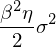

In [5]:
eta = Symbol('eta') #絶対的リスク回避度
rp = Rational(1,2)*eta*variance(w) #リスクプレミアム，variance()で分散を導出
rp

企業価値の定義

In [6]:
x = b*e

期待効用関数の定義

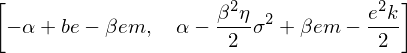

In [7]:
EUp = E(x - w) #プリンシパルの効用
EUa = E(w) - c - rp #エージェントの効用
[EUp, EUa]

## ファースト・ベスト

参加制約を満たす固定報酬$\alpha^{\ast}$を導出．

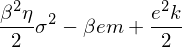

In [8]:
alpha_ast = solve(EUa, alpha)[0] #solve(式,変数)で式を変数について解いてくれる．解はリストで得られるので[0]をつけて，中身を取り出す．
alpha_ast

$\alpha^{\ast}$をプリンシパルの期待効用に代入．

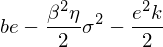

In [9]:
EUp_ast = EUp.subs(alpha, alpha_ast) #式.subs(変数,値)で変数に値を代入する
EUp_ast

プリンシパルの期待効用を最大化するような$e^{\ast}$を導出．

In [10]:
e_ast = solve(EUp_ast.diff(e), e)[0]#式.diff(変数)で式を変数で微分する．solve(式.diff(変数),変数)[0]微分した結果をeについて解いて値を取り出す．
e_ast

プリンシパルの期待効用を最大化するような$\beta^{\ast}$を導出．

In [11]:
beta_ast = solve(EUp_ast.diff(beta),beta)[0] #式.diff(変数)で式を変数で微分する．solve(式.diff(変数),変数)[0]微分した結果をbetaについて解いて値を取り出す．
beta_ast

## セカンドベスト

エージェントの効用を最大化するような努力水準を計算

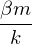

In [12]:
e_dag = solve(EUa.diff(e),e)[0]
e_dag

$e^{\dag}$をエージェントの確実性等価に代入

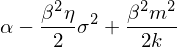

In [13]:
EUa_dag = EUa.subs(e, e_dag)
EUa_dag

これを$\alpha$について解く．

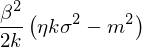

In [14]:
alpha_dag = solve(EUa_dag, alpha)[0]
alpha_dag

プリンシパルの効用関数に$\alpha^{\dag}$と$e^{\dag}$を代入

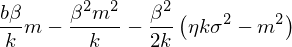

In [15]:
EUp_dag = EUp.subs(alpha, alpha_dag)
EUp_dag = EUp_dag.subs(e, e_dag)
EUp_dag

プリンシパルの期待効用を最大化するような$\beta$を導出

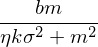

In [16]:
beta_dag = solve(EUp_dag.diff(beta), beta)[0]
beta_dag

プリンシパルの期待効用に代入

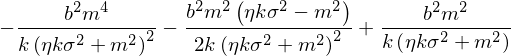

In [17]:
EUp_dagger = EUp_dag.subs(beta, beta_dag)
EUp_dagger

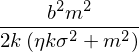

In [18]:
EUp_dagger = simplify(EUp_dagger) #複雑なのでsimplify()で単純化する
EUp_dagger

### 比較静学

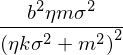

In [19]:
simplify(EUp_dagger.diff(m))

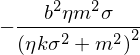

In [20]:
simplify(EUp_dagger.diff(sigma))

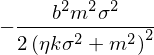

In [21]:
simplify(EUp_dagger.diff(eta))